In [ ]:
!pip install newspaper3k fake-useragent


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=e86f3c02156203ca3d2ba5b1eafd9f5a29f39aa06f38bde840f633c65bec0b77
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=fbf3e208d09eeea4a1a9d3ea54f9e7d8e4ecf463985744f5dc7fb127d85ea66a
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc

In [ ]:
import pandas as pd
from newspaper import Article
from fake_useragent import UserAgent
import requests
import re
from concurrent.futures import ThreadPoolExecutor


def clean_text(text):
    """Clean up the text by removing non-alphanumeric characters and excessive whitespace."""
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets (often citations or links)
    text = re.sub('<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+', '', text)  # Remove URLs

    text = re.sub(r'\W+', ' ', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    return text.strip()  # Remove leading and trailing whitespace

def fetch_and_process(url):
    """Fetch and process a single URL."""
    try:
        user_agent = UserAgent().random
        headers = {'User-Agent': user_agent}
        article = Article(url)
        article.download(input_html=requests.get(url, headers=headers, timeout=10).text)
        article.parse()
        cleaned_text = clean_text(article.text)
        if len(cleaned_text.split()) >= 100:  # Check if cleaned text has at least 100 words
            return cleaned_text
        else:
            return None
    except Exception as e:
        print(f"Failed to process {url}: {e}")
        return None




def process_urls(df, max_workers=10):
    """Process URLs from a DataFrame sorted by a numerical count in descending order."""
    #df_sorted = df.sort_values(by='Theme_Count', ascending=False)  # Assuming 'count' is the column name
    valid_articles = []

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        # Process URLs in order of their count
        for url in df['URL']:  # Assuming 'url' is the column name
            if len(valid_articles) >= 100:  # Stop once we have 100 valid articles
                break
            result = executor.submit(fetch_and_process, url)
            if result.result() is not None:
                valid_articles.append(result.result())

    return valid_articles

# Example DataFrame
# df = pd.DataFrame({
#     'url': ['http://example.com/article1', 'http://example.com/article2', ...],
#     'count': [123, 456, ...]
# })

# Adjust the DataFrame to your actual structure
# cleaned_articles = process_urls(df)
# for article in cleaned_articles:
#     print(article)


In [ ]:
import pandas as pd
import os

file_path = '/content/drive/MyDrive/CSCI-499 Project/CSV/fdata2019-01-01.csv'

df = pd.read_csv(file_path)

print(process_urls(df))



Failed to process https://extra.timesofoman.com/article/674075/Opinion/Columnist/Trump-vs-the-economy: HTTPSConnectionPool(host='extra.timesofoman.com', port=443): Max retries exceeded with url: /article/674075/Opinion/Columnist/Trump-vs-the-economy (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7decd3bbf970>: Failed to resolve 'extra.timesofoman.com' ([Errno -2] Name or service not known)"))
Failed to process https://www.pittsburghstar.com/news/258741486/us-stocks-farewell-2018-with-solid-rise: You must `download()` an article first!
Failed to process https://www.japanherald.com/news/258741486/us-stocks-farewell-2018-with-solid-rise: You must `download()` an article first!
Failed to process https://www.bangladeshsun.com/news/258741486/us-stocks-farewell-2018-with-solid-rise: You must `download()` an article first!
Failed to process https://www.irishsun.com/news/258741486/us-stocks-farewell-2018-with-solid-rise: You must `download()` an article first!
F

In [ ]:
#RUN THIS CELL
#RUN THIS CELL
#RUN THIS CELL
#RUN THIS CELL

!pip install newspaper3k fake-useragent

from google.colab import drive
drive.mount('/content/drive')


import os
import pandas as pd

import pandas as pd
from newspaper import Article
from fake_useragent import UserAgent
import requests
import re
from concurrent.futures import ThreadPoolExecutor


def clean_text(text):
    """Clean up the text by removing non-alphanumeric characters and excessive whitespace."""
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets (often citations or links)
    text = re.sub('<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+', '', text)  # Remove URLs

    text = re.sub(r'\W+', ' ', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    return text.strip()  # Remove leading and trailing whitespace

def fetch_and_process(url):
    """Fetch and process a single URL."""
    try:
        user_agent = UserAgent().random
        headers = {'User-Agent': user_agent}
        article = Article(url)
        article.download(input_html=requests.get(url, headers=headers, timeout=10).text)
        article.parse()
        cleaned_text = clean_text(article.text)
        if len(cleaned_text.split()) >= 100:  # Check if cleaned text has at least 100 words
            return cleaned_text
        else:
            return None
    except Exception as e:
        print(f"Failed to process {url}: {e}")
        return None




def process_urls(df, max_workers=10):
    """Process URLs from a DataFrame sorted by a numerical count in descending order."""
    #df_sorted = df.sort_values(by='Theme_Count', ascending=False)  # Assuming 'count' is the column name
    valid_articles = []

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        # Process URLs in order of their count
        for url in df['URL']:  # Assuming 'url' is the column name
            if len(valid_articles) >= 100:  # Stop once we have 100 valid articles
                break
            result = executor.submit(fetch_and_process, url)
            if result.result() is not None:
                valid_articles.append(result.result())

    return valid_articles


# Directory containing your CSV files
directory = '/content/drive/MyDrive/CSCI-499 Project/Filtered CSV'

# Set to keep track of processed files
processed_files = set(item[5:] for item in os.listdir('/content/drive/MyDrive/CSCI-499 Project/new_text/'))

# Continue looping until all CSV files are processed
while True:
    # List all files in the directory
    files = os.listdir(directory)

    # Filter for CSV files that haven't been processed yet
    csv_files = [file for file in files if file.endswith('.csv') and file not in processed_files]

    # Break the loop if no more CSV files to process
    if not csv_files:
        break

    for file in csv_files:
        # Construct the full file path
        file_path = os.path.join(directory, file)

        # Read the CSV file into a DataFrame
        try:
            df = pd.read_csv(file_path)

            # Process the DataFrame
            processed_df = pd.DataFrame(process_urls(df), columns = ['text'])

            # Save the processed DataFrame to CSV
            processed_df.to_csv('/content/drive/MyDrive/CSCI-499 Project/new_text/text_'+file, index=False)

            processed_files = set(item[5:] for item in os.listdir('/content/drive/MyDrive/CSCI-499 Project/new_text/'))

        except Exception as e:
            print(f"Error processing file {file}: {e}")
            # Optionally, handle specific exceptions if necessary

# At this point, all CSV files have been processed


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=ff10fd3197ec1e80d47288f09b7109a964fb3178b8751416e2d05482534603aa
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=b7004e6a5c8e23a262863c7b87379414edd27ab38a12484401096be71d4c270b
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Failed to process https://www.californiatelegraph.com/news/273018430/class-action-update-for-kss-open-and-argo-levi--korsinsky-llp-reminds-investors-of-class-actions-on-behalf-of-shareholders: You must `download()` an article first!
Failed to process https://www.hawaiitelegraph.com/news/273018430/class-action-update-for-kss-open-and-argo-levi--korsinsky-llp-reminds-investors-of-class-actions-on-behalf-of-shareholders: You must `download()` an article first!
Failed to process https://www.phoenixherald.com/news/273022655/rosen-global-investor-counsel-encourages-yatsen-holding-limited-investors-with-losses-to-secure-counsel-before-important-deadline-in-securities-class-action---ysg: You must `download()` an article first!
Failed to process https://www.phoenixherald.com/news/273023183/rosen-skilled-investor-counsel-encourages-rite-aid-corporation-investors-to-secure-counsel-before-important-deadline-in-securities-class-action---rad: You must `download()` an article first!
Failed to process

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Failed to process https://www.londonmercury.com/news/273114789/biden-seeks-9-billion-for-covid-37-billion-for-ukraine: You must `download()` an article first!
Failed to process https://www.albuquerqueexpress.com/news/273114812/rosen-skilled-investor-counsel-encourages-figs-inc-investors-to-secure-counsel-before-important-deadline-in-securities-class-action---figs: You must `download()` an article first!
Failed to process https://www.clevelandstar.com/news/273115244/curv-equity-alert-rosen-a-respected-and-leading-firm-encourages-torrid-holdings-investors-to-secure-counsel-before-important-deadline-in-securities-class-action---curv: You must `download()` an article first!
Failed to process https://www.dallassun.com/news/273114793/rosen-national-trial-lawyers-encourages-rite-aid-corporation-investors-with-losses-to-secure-counsel-before-important-deadline-in-securities-class-action---rad: You must `download()` an article first!
Failed to process https://www.dallassun.com/news/273114811/ho

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Failed to process https://science.thewire.in/environment/climate-injustice-india-tn-women-collective/: HTTPSConnectionPool(host='science.thewire.in', port=443): Max retries exceeded with url: /environment/climate-injustice-india-tn-women-collective/ (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7d4238955630>, 'Connection to science.thewire.in timed out. (connect timeout=10)'))
Failed to process https://menafn.com/1105210240/What-Should-Jittery-China-Investors-Do: HTTPSConnectionPool(host='menafn.com', port=443): Max retries exceeded with url: /1105210240/What-Should-Jittery-China-Investors-Do (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7d4237f592d0>, 'Connection to menafn.com timed out. (connect timeout=10)'))
Failed to process https://www.thisdaylive.com/index.php/2022/11/21/interest-rate-on-t-bills-hit-32-month-high-as-cbn-mops-n5-33trn-in-primary-market/: HTTPSConnectionPool(host='www.thisdaylive.com', port=443): Re

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Failed to process https://www.phoenixherald.com/news/273130192/lifshitz-law-pllc-announces-investigations-of-bnft-imgo-myov-and-hvbc: You must `download()` an article first!
Failed to process https://www.nashvilleherald.com/news/273130140/digital-world-acquisition-corp-announces-voting-results-of-special-meeting-to-approve-the-extension-amendment: You must `download()` an article first!
Failed to process https://www.nashvilleherald.com/news/273130192/lifshitz-law-pllc-announces-investigations-of-bnft-imgo-myov-and-hvbc: You must `download()` an article first!
Failed to process https://www.phoenixherald.com/news/273130193/lifshitz-law-pllc-announces-investigations-of-elvt-opnt-wafd-and-lbc: You must `download()` an article first!
Failed to process https://www.nashvilleherald.com/news/273130193/lifshitz-law-pllc-announces-investigations-of-elvt-opnt-wafd-and-lbc: You must `download()` an article first!
Failed to process https://www.nashvilleherald.com/news/273130194/lifshitz-law-pllc-ann

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Failed to process https://markets.buffalonews.com/buffnews/article/newsfile-2022-11-28-netcon-group-llc-launch-netcon-community-to-connect-globally: HTTPSConnectionPool(host='markets.buffalonews.com', port=443): Max retries exceeded with url: /buffnews/article/newsfile-2022-11-28-netcon-group-llc-launch-netcon-community-to-connect-globally (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7d4237d31000>: Failed to resolve 'markets.buffalonews.com' ([Errno -2] Name or service not known)"))
Failed to process https://www.albuquerqueexpress.com/news/273133950/olo-24-hour-deadline-alert-former-louisiana-attorney-general-and-kahn-swick--foti-llc-remind-investors-with-losses-in-excess-of-100000-of-deadline-in-class-action-lawsuit-against-olo-inc---olo: You must `download()` an article first!
Failed to process https://www.clevelandstar.com/news/273133950/olo-24-hour-deadline-alert-former-louisiana-attorney-general-and-kahn-swick--foti-llc-remind-investors-with-loss

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Failed to process https://www.dallassun.com/news/273204748/rosen-national-trial-attorneys-encourages-us-bancorp-investors-to-secure-counsel-before-important-december-27-deadline-in-securities-class-action---usb: You must `download()` an article first!
Failed to process https://www.newyorkstatesman.com/news/273204451/us-stock-markets-nervous-ahead-of-def-rate-decision: You must `download()` an article first!
Failed to process https://www.shanghainews.net/news/273204451/nasdaq-composite-jumps-1-percent-as-volatility-rises: You must `download()` an article first!
Failed to process https://www.floridastatesman.com/news/273204451/us-stock-markets-nervous-ahead-of-def-rate-decision: You must `download()` an article first!
Failed to process https://www.asiabulletin.com/news/273204451/us-stock-markets-nervous-ahead-of-def-rate-decision: You must `download()` an article first!
Failed to process https://www.dallassun.com/news/273205393/class-action-update-for-argo-olpx-and-gps-levi--korsinsky-ll

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Failed to process https://www.baltimorestar.com/news/273216878/securities-litigation-partner-james-josh-wilson-encourages-investors-who-suffered-losses-exceeding-100000-in-singularity-to-contact-him-directly-to-discuss-their-options: You must `download()` an article first!
Failed to process https://www.afghanistansun.com/news/273216741/us-stock-markets-on-back-foot-nasdaq-composite-sheds-more-than-3: You must `download()` an article first!
Failed to process https://www.russiaherald.com/news/273216741/us-stock-markets-on-back-foot-nasdaq-composite-sheds-more-than-3: You must `download()` an article first!
Failed to process https://www.memphissun.com/news/273216741/us-stock-markets-on-back-foot-nasdaq-composite-sheds-more-than-3: You must `download()` an article first!
Failed to process https://www.memphissun.com/news/273216795/camber-energy-inc-discloses-one-for-fifty-reverse-stock-split: You must `download()` an article first!
Failed to process https://www.memphissun.com/news/273216796

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Failed to process https://www.batonrougepost.com/news/273228530/uaq-ruler-congratulates-emir-of-qatar-on-national-day: You must `download()` an article first!


/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Failed to process https://www.londonmercury.com/news/273230083/vietnam-us-discuss-purchase-of-military-equipment: You must `download()` an article first!
Failed to process https://www.londonmercury.com/news/273230084/chinese-firms-could-return-to-us-stock-exchange-after-nod-to-us-audits: You must `download()` an article first!
Failed to process https://www.texasguardian.com/news/273230083/vietnam-us-discuss-purchase-of-military-equipment: You must `download()` an article first!
Failed to process https://www.texasguardian.com/news/273230084/chinese-firms-could-return-to-us-stock-exchange-after-nod-to-us-audits: You must `download()` an article first!
Failed to process https://www.hawaiitelegraph.com/news/273230085/rosen-a-top-ranked-firm-encourages-twist-bioscience-corporation-investors-with-losses-to-secure-counsel-before-important-deadline-in-securities-class-action---twst: You must `download()` an article first!
Failed to process https://www.clevelandstar.com/news/273230083/vietnam-u

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Failed to process https://www.caribbeanherald.com/news/273268272/domestic-markets-gain-snap-losing-run-in-morning-trade: You must `download()` an article first!
Failed to process https://www.japanherald.com/news/273268272/domestic-markets-gain-snap-losing-run-in-morning-trade: You must `download()` an article first!
Failed to process https://www.iraqsun.com/news/273268272/domestic-markets-gain-snap-losing-run-in-morning-trade: You must `download()` an article first!
Failed to process https://menafn.com/1105352423/Asian-stocks-start-week-positively: HTTPSConnectionPool(host='menafn.com', port=443): Max retries exceeded with url: /1105352423/Asian-stocks-start-week-positively (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7d4237f599c0>, 'Connection to menafn.com timed out. (connect timeout=10)'))
Failed to process https://www.myanmarnews.net/news/273268272/domestic-markets-gain-snap-losing-run-in-morning-trade: You must `download()` an article first!
Faile

In [ ]:
cleaned_articles = scrape_and_clean_news(extracted_urls)
for article in cleaned_articles:
    print(article)

Failed to process https://www.newyorktelegraph.com/news/258740402/rice-shortages-hamper-recovery-efforts-in-laos: You must `download()` an article first!
Failed to process https://www.laosnews.net/news/258740402/rice-shortages-hamper-recovery-efforts-in-laos: You must `download()` an article first!
Failed to process https://english.vietnamnet.vn/fms/business/215051/improving-business-environment-is-government-s-priority-in-2019.html: HTTPSConnectionPool(host='english.vietnamnet.vn', port=443): Max retries exceeded with url: /fms/business/215051/improving-business-environment-is-government-s-priority-in-2019.html (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7fa87a362860>: Failed to resolve 'english.vietnamnet.vn' ([Errno -2] Name or service not known)"))


/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Failed to process https://www.orlandoecho.com/news/258741486/us-stocks-farewell-2018-with-solid-rise: You must `download()` an article first!
Failed to process https://www.australiannews.net/news/258740402/rice-shortages-hamper-recovery-efforts-in-laos: You must `download()` an article first!
Failed to process https://www.newyorkstatesman.com/news/258741486/us-stocks-farewell-2018-with-solid-rise: You must `download()` an article first!Failed to process https://www.sturgisjournal.com/zz/news/20181231/animal-advocates-fatal-zoo-mauling-shows-need-for-crackdown: You must `download()` an article first!

Failed to process http://www.wellsvilledaily.com/zz/news/20181231/animal-advocates-fatal-zoo-mauling-shows-need-for-crackdown: HTTPSConnectionPool(host='www.wellsvilledaily.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'www.wellsvi

In [ ]:
len(cleaned_articles)

131

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import yfinance as yf
import pandas as pd

# Define the VIX ticker symbol
vix_ticker = "^VIX"

# Create a Ticker object for the VIX
vix = yf.Ticker(vix_ticker)

# Fetch historical data for the VIX from its earliest available date to the present
vix_data = vix.history(start="1990-01-01")



In [ ]:
vix_data['Close'].head() #treat the closing value for the day as the vix for the day

Date
1990-01-02 00:00:00-06:00    17.240000
1990-01-03 00:00:00-06:00    18.190001
1990-01-04 00:00:00-06:00    19.219999
1990-01-05 00:00:00-06:00    20.110001
1990-01-08 00:00:00-06:00    20.260000
Name: Close, dtype: float64

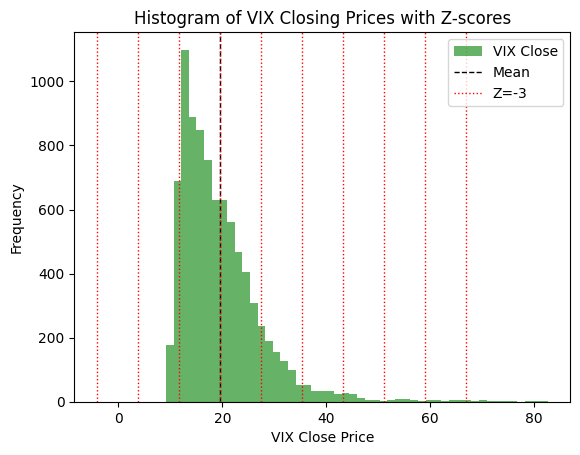

19.53650885547859 7.891632506108138


In [2]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np

# Assuming 'vix_data' is your DataFrame and it contains a 'Close' column

# Calculate mean and standard deviation of the VIX 'Close' data
vix_mean = vix_data['Close'].mean()
vix_std = vix_data['Close'].std()

# Plot histogram of the VIX 'Close' data
plt.hist(vix_data['Close'], bins=50, alpha=0.6, color='g', label='VIX Close')

# Plot vertical line for mean
plt.axvline(vix_mean, color='k', linestyle='dashed', linewidth=1, label='Mean')

# Plot vertical lines for integer Z-scores
z_scores = np.arange(-3, 7, 1)  # Integer Z-scores from -3 to 3
for z in z_scores:
    value = vix_mean + z*vix_std
    plt.axvline(value, color='r', linestyle='dotted', linewidth=1, label=f'Z={z}' if z == -3 else "")

plt.title('Histogram of VIX Closing Prices with Z-scores')
plt.xlabel('VIX Close Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(vix_mean, vix_std)


In [ ]:
vix_data['Log_Normalized_Close'] = np.log(vix_data['Close'])

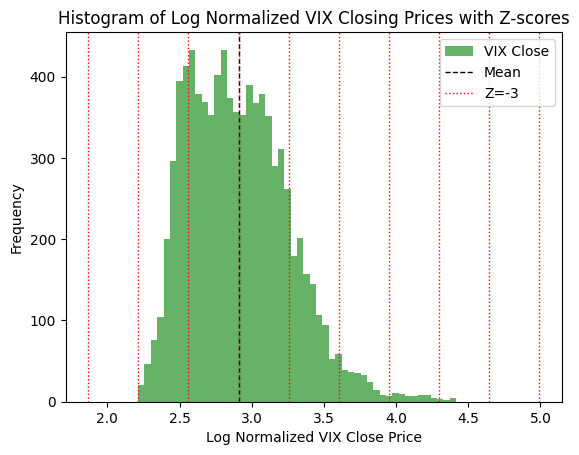

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np

# Assuming 'vix_data' is your DataFrame and it contains a 'Close' column

# Calculate mean and standard deviation of the VIX 'Close' data
vix_mean = vix_data['Log_Normalized_Close'].mean()
vix_std = vix_data['Log_Normalized_Close'].std()

# Plot histogram of the VIX 'Close' data
plt.hist(vix_data['Log_Normalized_Close'], bins=50, alpha=0.6, color='g', label='VIX Close')

# Plot vertical line for mean
plt.axvline(vix_mean, color='k', linestyle='dashed', linewidth=1, label='Mean')

# Plot vertical lines for integer Z-scores
z_scores = np.arange(-3, 7, 1)  # Integer Z-scores from -3 to 3
for z in z_scores:
    value = vix_mean + z*vix_std
    plt.axvline(value, color='r', linestyle='dotted', linewidth=1, label=f'Z={z}' if z == -3 else "")

plt.title('Histogram of Log Normalized VIX Closing Prices with Z-scores')
plt.xlabel('Log Normalized VIX Close Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Assuming you have a DataFrame vix_data with a column 'Log_Normalized_Close' that contains log-normalized VIX close prices

# Calculate mean and standard deviation of the log-normalized VIX 'Close' data
log_vix_mean = vix_data['Log_Normalized_Close'].mean()
log_vix_std = vix_data['Log_Normalized_Close'].std()

# Create a dictionary to hold the Z-score thresholds and corresponding VIX values
z_score_thresholds = {}

# Calculate actual VIX values for integer Z-scores from -3 to 3
z_scores = np.arange(-3, 5, 1)  # Integer Z-scores from -3 to 3
for z in z_scores:
    value = log_vix_mean + z*log_vix_std
    # Translate log-normalized value back to the actual VIX value
    actual_vix_value = np.exp(value)
    z_score_thresholds[z] = actual_vix_value

# Print out the Z-score thresholds and corresponding VIX values
for z, vix_value in z_score_thresholds.items():
    print(f"Z-score {z}: VIX value {vix_value}")


Z-score -3: VIX value 6.467961415932856
Z-score -2: VIX value 9.151947505360567
Z-score -1: VIX value 12.949697401494987
Z-score 0: VIX value 18.32338556269714
Z-score 1: VIX value 25.926973277421723
Z-score 2: VIX value 36.685793737628124
Z-score 3: VIX value 51.90916223652741
Z-score 4: VIX value 73.44971580468615


In [ ]:
import pandas as pd
!pip install pandas_market_calendars
import pandas_market_calendars as mcal

# Create a calendar for CBOE
cboe = mcal.get_calendar('CBOE_Futures')

# Define the date range
start_date = '2019-01-01'
end_date = '2022-12-31'

# Get the trading days
cboe_schedule = cboe.schedule(start_date=start_date, end_date=end_date)

# Count the number of trading days
trading_days_count = len(cboe_schedule)

print(f'The CBOE was open for {trading_days_count} days from {start_date} to {end_date}.')


The CBOE was open for 1010 days from 2019-01-01 to 2022-12-31.


In [ ]:
import os
processed_files = set(item[5:] for item in os.listdir('/content/drive/MyDrive/CSCI-499 Project/text/'))
print(processed_files)

{'fdata2019-01-07.csv', 'fdata2019-01-22.csv', 'fdata2019-01-06.csv', 'fdata2019-01-20.csv', 'fdata2019-02-10.csv', 'fdata2019-02-15.csv', 'fdata2019-01-08.csv', 'fdata2019-02-03.csv', 'fdata2019-01-18.csv', 'fdata2019-01-23.csv', 'fdata2019-01-14.csv', 'fdata2019-01-26.csv', 'fdata2019-01-31.csv', 'fdata2019-02-09.csv', 'fdata2019-02-02.csv', 'fdata2019-01-05.csv', 'fdata2019-01-27.csv', 'fdata2019-01-15.csv', 'fdata2019-02-17.csv', 'fdata2019-02-19.csv', 'fdata2019-01-25.csv', 'fdata2019-02-18.csv', 'fdata2019-01-04.csv', 'fdata2019-01-28.csv', 'fdata2019-02-04.csv', 'fdata2019-01-01.csv', 'fdata2019-02-16.csv', 'fdata2019-01-12.csv', 'fdata2019-01-02.csv', 'fdata2019-02-01.csv', 'fdata2019-01-19.csv', 'fdata2019-01-13.csv', 'fdata2019-02-12.csv', 'fdata2019-02-08.csv', 'fdata2019-02-11.csv', 'fdata2019-01-21.csv', 'fdata2019-01-17.csv', 'fdata2019-02-07.csv', 'fdata2019-02-06.csv', 'fdata2019-01-16.csv', 'fdata2019-01-29.csv', 'fdata2019-02-14.csv', 'fdata2019-01-09.csv', 'fdata2019